## Multivariate Time Series Prediction Module Example

In [ ]:
from mtsPrediction import mtsPredictionModule, tsEncodingFFT

In [31]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(1000)
t2 = np.arange(1000) * 0.8
ts1 = np.sin(t * 0.1)
ts2 = np.cos(t2 * 0.1) + np.sin(t2 * 0.05)
ts3 = np.sin(ts1) + np.cos(ts2)
ts4 = np.cosh(ts3 * 0.01) * np.sinh(ts3)

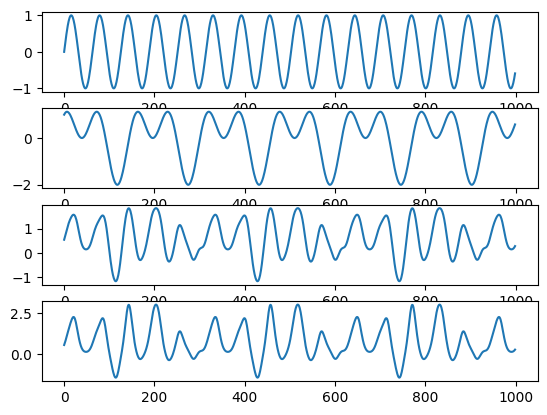

In [32]:
# the multivariate time series we are trying to predict
fig, axis = plt.subplots(4, )
axis[0].plot(t, ts1)
axis[1].plot(t, ts2)
axis[2].plot(t, ts3)
axis[3].plot(t, ts4)
plt.show()

In the input multivariate time series, every single example has length 30 with 4 dimensions (given 4 variables); the output dimension has length 15 with 4 dimensions. This is given 30 steps in the past, predict 15 steps into the future.

In [33]:
mts = np.array([ts1, ts2, ts3, ts4]).T

horizon = 15; window = 30
Xinput = []
Xoutput = []
for i in range(mts.shape[0]):
    if i >= window - 1:
        Xinput.append(mts[i - window + 1:i + 1])
        if i < mts.shape[0] - horizon:
            Xoutput.append(mts[i+1:i + horizon+1])
        else:
            Xoutput.append(np.zeros((horizon, mts.shape[1])))
    else:
        Xinput.append(np.zeros((window, mts.shape[1])))
        Xoutput.append(np.zeros((horizon, mts.shape[1])))
Xexog = np.zeros((mts.shape[0], 0)) # here we are passing in empty exogenous variables, which can be used to introduce additional information besides the time series patterns
Xinput = np.array(Xinput)
Xoutput = np.array(Xoutput)
XinputTrain = Xinput[:int(Xinput.shape[0] * 0.8)]
XoutputTrain = Xoutput[:int(Xoutput.shape[0] * 0.8)]
XexogTrain = Xexog[:int(Xexog.shape[0] * 0.8)]
XinputTest = Xinput[int(Xinput.shape[0] * 0.8):]
XoutputTest = Xoutput[int(Xoutput.shape[0] * 0.8):]
XexogTest = Xexog[int(Xexog.shape[0] * 0.8):]

inputEncoding = tsEncodingFFT()
outputEncoding = tsEncodingFFT()

model = mtsPredictionModule().fit(Xinput=XinputTrain, Xexog=XexogTrain, Xoutput=XoutputTrain, sig=np.ones(XinputTrain.shape[0]), inputEncoding=inputEncoding, outputEncoding=outputEncoding, horizon=horizon, window=window)

In [34]:
# now test the prediction results
preds = np.array([model.predict(XinputTest[i,:,:], XexogTest[i,:])[-1,:] for i in range(XinputTest.shape[0])])
labels = XoutputTest[:,-1,:]

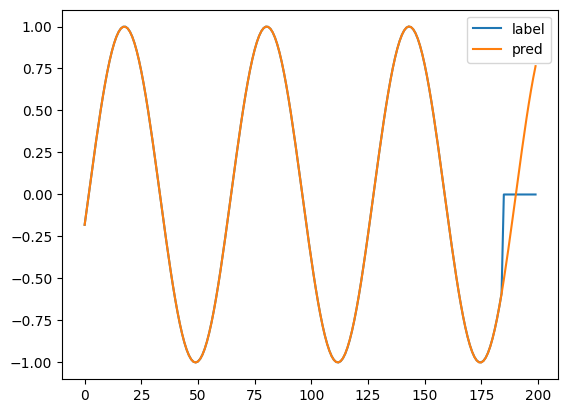

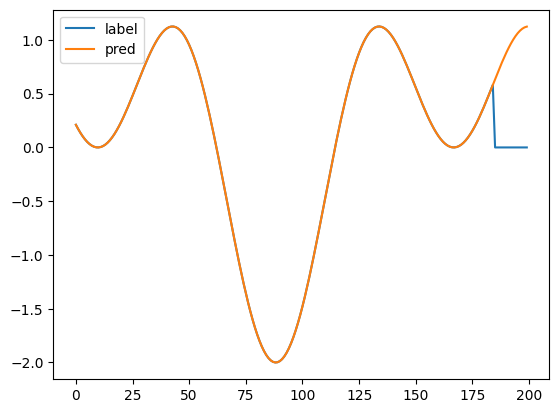

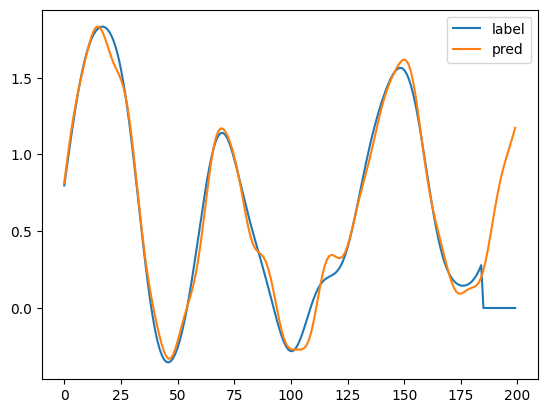

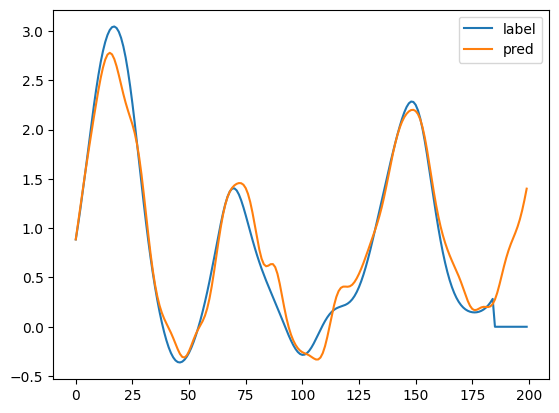

In [35]:
for j in range(labels.shape[1]):
    plt.plot(labels[:,j], label='label')
    plt.plot(preds[:,j], label='pred')
    plt.legend()
    plt.show()